# The corpus-level topic proportions versus number of documents processed

In [1]:
from utils import GEM_expectation
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [13]:
def degen(exproot, num_docs, ax1, ax2):
    """
    Inputs:
        topicroot: "results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100/" for instance
        num_docs: "[500, 1000, 1500]", for instance
        ax1, ax2: where to plot
    Outputs:
        interpret the expected topic proportions as a distribution over 
        topics; plot the entropy and the top two differences for different
        number of mini-batches in iterations
    """
    ents = []
    top2diff = []
    
    for t in num_docs:
        testa = np.loadtxt(exproot + "doc_count-" + str(t) + ".a")
        testb = np.loadtxt(exproot + "doc_count-" + str(t) + ".b")
        probs = GEM_expectation(testa[np.newaxis,:],testb[np.newaxis,:]).flatten()
        # sort topics first by probs
        idx = [i for i in reversed(np.argsort(probs))]
        probs = probs[idx]
        # entropy
        ents.append(entropy(probs))
        # top2diff
        top2diff.append(probs[0]-probs[1])
        
    ax1.plot(num_docs,ents,label='Entropy')
    ax1.set_xlabel("Number of documents seen")
    ax1.legend()
    
    ax2.plot(num_docs,top2diff,label='top2diff')
    ax2.set_xlabel("Number of documents seen")
    ax2.legend()

    return

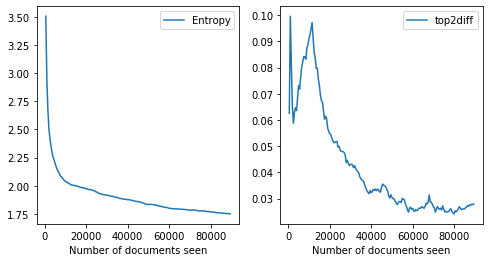

In [14]:
fig, axes = plt.subplots(1,2,figsize=(8,4))

degen("results/corpus-wiki-kappa-0.7-tau-1024-batchsize-100/", range(500,90000,500), axes[0], axes[1])

plt.show()